In [3]:

# Some preliminary imports
%matplotlib inline

import numpy as np
import sklearn.datasets as data
import sklearn.metrics.pairwise as pairwise
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt




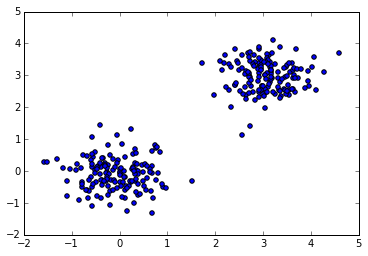

In [4]:
# Let's generate some toy data.
X, y = data.make_blobs(n_samples = 300, centers = np.array([[0, 0], [3, 3]]), cluster_std = 0.5, random_state = 12, shuffle = False)
plt.scatter(X[:, 0], X[:, 1])

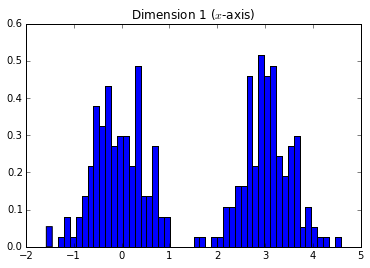

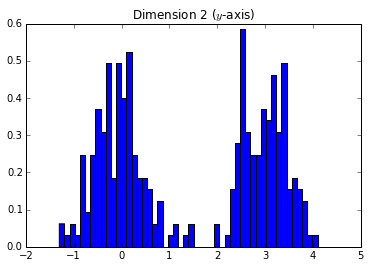

In [5]:
# We'll make the number of bins, B
B = 50
plt.figure(0)
plt.hist(X[:, 0], bins = B, normed = True)
plt.title("Dimension 1 ($x$-axis)")
plt.figure(1)
plt.hist(X[:, 1], bins = B, normed = True)
plt.title("Dimension 2 ($y$-axis)")

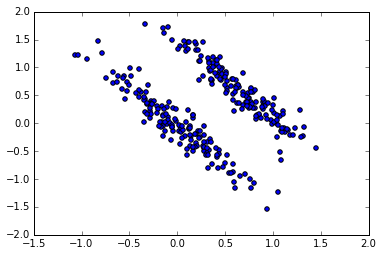

In [7]:
rng = np.random.RandomState(74)
t = rng.normal(size = (2, 2))
Xr = np.dot(X,t)
plt.scatter(Xr[:, 0], Xr[:, 1])

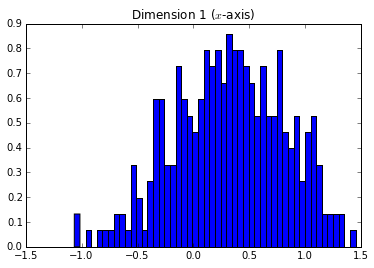

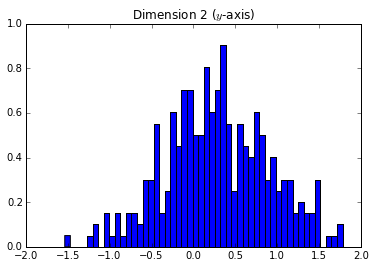

In [9]:
plt.figure(0)
plt.hist(Xr[:, 0], bins = B, normed = True)
plt.title("Dimension 1 ($x$-axis)")
plt.figure(1)
plt.hist(Xr[:, 1], bins = B, normed = True)
plt.title("Dimension 2 ($y$-axis)")


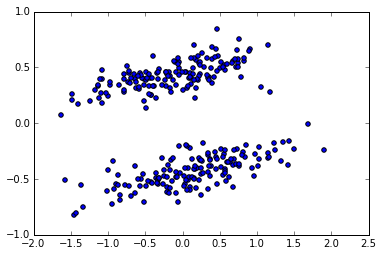

In [11]:
from sklearn.decomposition import RandomizedPCA

pca = RandomizedPCA(n_components = 2, random_state = 12)
Xt = pca.fit_transform(Xr)
plt.scatter(Xt[:, 0], Xt[:, 1])

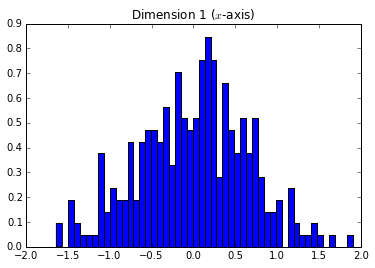

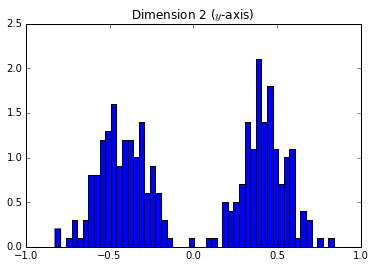

In [12]:
plt.figure(0)
plt.hist(Xt[:, 0], bins = B, normed = True)
plt.title("Dimension 1 ($x$-axis)")
plt.figure(1)
plt.hist(Xt[:, 1], bins = B, normed = True)
plt.title("Dimension 2 ($y$-axis)")

In [14]:
# First, define the method that, given a 1D histogram of the data, will return the 
# solution to the generalized eigenvalue problem as defined in Eq. 2 of the Fergus paper.
import scipy.linalg as sla
def solve(hist):
    """
    hist : 1D histogram
    """
    W = pairwise.rbf_kernel(hist.reshape(-1, 1))
    P = np.diag(hist)
    PW = np.dot(P,W)  #  matrix-matrix multiplication in Python 3
    PWP = np.dot(PW,P)
    Ds = np.diag(PWP.sum(axis = 0))  # sum along the COLUMNS of PWP
    Dh = np.diag(PW.sum(axis = 0))  # sum along the COLUMNS of PW
    
    # Solve the generalized eigenvalue problem for symmetric matrices (this is, after all, a laplacian).
    L = Ds - PWP
    b = np.dot(P,Dh)
    v, U = sla.eigh(L, b = b)
    return [v, U]

# Second, we'll create the 1D histograms for each dimension.
h1, e1 = np.histogram(Xt[:, 0], bins = B)
h2, e2 = np.histogram(Xt[:, 1], bins = B)
# Sidestep: add a small amount to each histogram bin, then renormalize to a density.
h1 = np.array(h1, dtype = np.float) + 0.01
h1 /= h1.sum()
h2 = np.array(h2, dtype = np.float) + 0.01
h2 /= h2.sum()

# Finally, we'll invoke the solver we wrote.
v1, U1 = solve(h1)
v2, U2 = solve(h2)

In [15]:
U1.shape

(50, 50)

In [16]:
v1.shape

(50,)

In [17]:
k = 2
EF = np.zeros(shape = (U2.shape[1], k))
EV = np.zeros(k)

EF[:, 0] = U1[:, 1]
EV[0] = v1[1]
EF[:, 1] = U2[:, 1]
EV[1] = v2[1]

In [20]:
# Create the x-axis from the histogram edges.
x1 = np.array([e1[i:i + 2].mean() for i in range(e1.shape[0] - 1)])  # Finds the midpoints of the histogram bins.
x2 = np.array([e2[i:i + 2].mean() for i in range(e2.shape[0] - 1)])


In [34]:
x1.shape

(50,)

In [32]:
v1

array([ -3.63394859e-16,   9.99560632e-01,   9.99999874e-01,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,

In [25]:
x1.shape

(50,)